In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
file = r'./data/Merged_Checkshots'

def loadCheckshot(file):
    """
    Load Petrel exported checkshot file
    """
    f = open(file, 'r')
    line = f.readline()
    column_names = []
    while not line.startswith('END'):
        if not line.startswith('#'):
            if not line.startswith('V'):
                if not line.startswith('BEGIN'):
                    column_names.append(line.rstrip())
        line = f.readline()
    f.close()
    
    df = pd.read_csv(file, skiprows=17, header=None, delim_whitespace=True, na_values=-999.0, names=column_names)
    
    return df

cshots = loadCheckshot(file)
cshots.head()

,X,Y,Z,TWT picked,MD,Well,Average velocity,Interval velocity,"FLOAT,Continuous","FLOAT,User",Replacement velocity
0,429692.30,7869591.04,0.00,-0.0,24.0,7019/01-01,NaN,1478.02,0.0,190.0,NaN
1,429695.25,7869589.36,-1180.97,-1138.9,1205.0,7019/01-01,2073.87,2758.62,1.0,1181.0,NaN
2,429695.22,7869589.35,-1200.97,-1153.4,1225.0,7019/01-01,2082.48,2836.87,2.0,1201.0,NaN
3,429695.18,7869589.33,-1220.97,-1167.5,1245.0,7019/01-01,2091.59,3076.92,3.0,1221.0,NaN
4,429695.15,7869589.31,-1240.97,-1180.5,1265.0,7019/01-01,2102.44,2962.96,4.0,1241.0,NaN


In [14]:
cshots.columns

Index(['X', 'Y', 'Z', 'TWT picked', 'MD', 'Well', 'Average velocity',
       'Interval velocity', 'FLOAT,Continuous', 'FLOAT,User',
       'Replacement velocity'],
      dtype='object')

In [16]:
cshots.Z = cshots.Z * -1
cshots['TWT picked'] = cshots['TWT picked'] * -1
cshots.drop(['FLOAT,Continuous', 'FLOAT,User', 'Replacement velocity'], axis=1, inplace=True)

In [17]:
cshot_wells = list(cshots['Well'].unique())

In [ ]:
cshots[ cshots['Well']=='7120/12-03']

Text(0.5,0,'Depth (tvdss)')

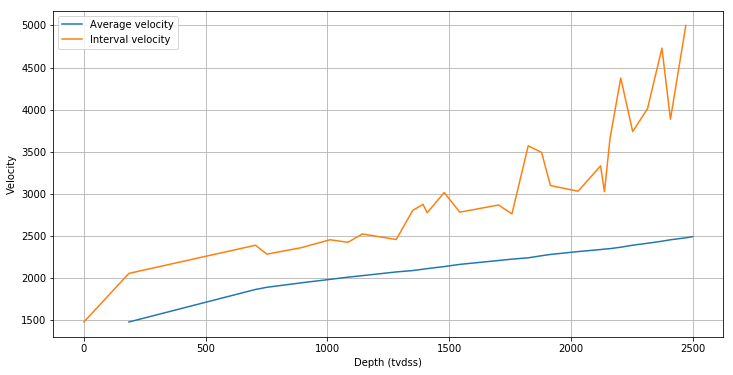

In [19]:
plt.figure(figsize=(12,6))

plt.plot(cshots[ cshots['Well']=='7120/12-03']['Z'], cshots[ cshots['Well']=='7120/12-03']['Average velocity'] )
plt.plot(cshots[ cshots['Well']=='7120/12-03']['Z'], cshots[ cshots['Well']=='7120/12-03']['Interval velocity'] )

plt.legend(loc=0)
plt.grid(True)
plt.ylabel('Velocity')
plt.xlabel('Depth (tvdss)')
